1. Constructing a Fully-Connected Model: For this problem, you will be using the breast
cancer dataset of scikit-learn. Use the following piece of code
from sklearn.datasets import load breast cancer
bc = load breast cancer()
to download the data. Use the description provided by scikit-learn and familiarize yourself
with the dataset (Use print(bc.DESCR) to view the description).

In [2]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the dataset
bc = load_breast_cancer()

# Create a pandas DataFrame
df = pd.DataFrame(bc.data, columns=bc.feature_names)

# Add a target column to the DataFrame
df['target'] = bc.target

print(df['target'].value_counts())

1    357
0    212
Name: target, dtype: int64


(a) How many features does the breast cancer dataset possess? Specify the nature of the
classification problem (i.e. binary vs. multinomial, and balanced vs. unbalanced).


The load_breast_cancer has 30 features and has around 212 Malignant and 357 Benign cases. Hence it is a binary classification problem  with fairly balanced data set.

(b) Implement a random forest classifier on the whole dataset and identify the 10 most
relevant features. For the rest of the problem, focus on these 10 features.


In [4]:
# Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
X=df.drop('target',axis=1)
y=df['target']

In [6]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=500, random_state=3) # Instantiating 'RandomForestRegressor'
rf_reg.fit(X, y)   # Fitting the data

RandomForestRegressor(n_estimators=500, random_state=3)

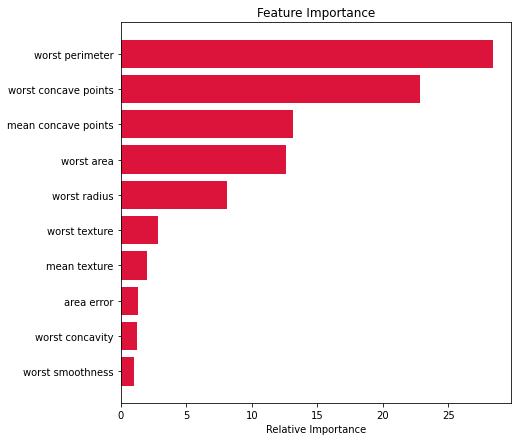

1. worst perimeter (28.412001)
2. worst concave points (22.823574)
3. mean concave points (13.177474)
4. worst area (12.627946)
5. worst radius (8.103463)
6. worst texture (2.808442)
7. mean texture (2.020075)
8. area error (1.316316)
9. worst concavity (1.255901)
10. worst smoothness (1.037313)


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Calculating the feature importance
feature_importance = rf_reg.feature_importances_
feature_importance = 100.0*(feature_importance/np.sum(feature_importance))

# Displaying the relative feature importance by a horizontal bar chart 
sorted_idx = np.argsort(feature_importance)[-10:] # Selecting the top 10 features
pos = np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(7, 7))

plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
plt.yticks(pos, np.array(bc.feature_names)[sorted_idx])
plt.show()
k=1
# Print the names of the top 10 features along with their relative importance
for i in range(len(sorted_idx)-1,-1,-1):
    print("%d. %s (%f)" % (k, bc.feature_names[sorted_idx[i]], feature_importance[sorted_idx[i]]))
    k=k+1

Randomforestclassifier is applied on the entire data set and the top 10 most important features are worst area, worst concave points, mean concave points, worst radius, worst perimeter, mean perimeter, mean concavity, mean area, worst concavity, mean radius.

(c)Split the data into train and test with the test size being 0.25 of the size of the whole
dataset

In [8]:

X = df[['worst perimeter', 'worst concave points', 'mean concave points', 'worst area', 'worst radius', 'worst texture', 
     'mean texture', 'area error','worst concavity','worst smoothness']]

# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

(d) Construct a fully-connected neural network for this classification problem. In your training, calculate the accuracy score and the mean F1-score for the train and test data at
each epoch. Plot your accuracy per epoch for both train and test data.
Note: Once the training is complete, the accuracy score and the mean F1-score of
your fully-connected model should reach to at least ∼ 90% for both train and test data.
Moreover, your model should not suffer from a high level of overfitting.

In [9]:

import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt




In [10]:




# Normalize the data
X_train_norm = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test_norm = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

# Construct the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_norm.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Initialize lists to store accuracy and mean F1-score at each epoch
train_acc = []
test_acc = []
train_f1 = []
test_f1 = []


# Train the model
#history = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=50, batch_size=32, verbose=0)
    
for i in range(50):
    # Train the model
    history = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1, batch_size=32, verbose=0)
    
    
    # Calculate accuracy and mean F1-score for train and test data
    train_acc.append(history.history['accuracy'][0])
    test_acc.append(history.history['val_accuracy'][0])
    y_train_pred = np.round(model.predict(X_train_norm))
    y_test_pred = np.round(model.predict(X_test_norm))
    train_f1.append(f1_score(y_train, y_train_pred))
    test_f1.append(f1_score(y_test, y_test_pred))

    # Print accuracy and mean F1-score for train and test data at each epoch
    print(f"Epoch {i+1}/{50}: Train accuracy: {train_acc[-1]:.4f}, Test accuracy: {test_acc[-1]:.4f}, Train F1-score: {train_f1[-1]:.4f}, Test F1-score: {test_f1[-1]:.4f}")

#for i in range(50):
 #   print(f"Epoch {i+1}/{50}: Train accuracy: {train_acc[-1]:.4f}, Test accuracy: {test_acc[-1]:.4f}, Train F1-score: {train_f1[-1]:.4f}, Test F1-score: {test_f1[-1]:.4f}")




5/5 [==============================] - 0s 1ms/step
Epoch 1/50: Train accuracy: 0.7300, Test accuracy: 0.9790, Train F1-score: 0.9741, Test F1-score: 0.9832
5/5 [==============================] - 0s 1ms/step
Epoch 2/50: Train accuracy: 0.9695, Test accuracy: 0.9860, Train F1-score: 0.9762, Test F1-score: 0.9889
5/5 [==============================] - 0s 1ms/step
Epoch 3/50: Train accuracy: 0.9718, Test accuracy: 0.9860, Train F1-score: 0.9798, Test F1-score: 0.9889
5/5 [==============================] - 0s 1ms/step
Epoch 4/50: Train accuracy: 0.9765, Test accuracy: 0.9860, Train F1-score: 0.9816, Test F1-score: 0.9889
5/5 [==============================] - 0s 1ms/step
Epoch 5/50: Train accuracy: 0.9765, Test accuracy: 0.9860, Train F1-score: 0.9852, Test F1-score: 0.9889
5/5 [==============================] - 0s 1ms/step
Epoch 6/50: Train accuracy: 0.9812, Test accuracy: 0.9860, Train F1-score: 0.9852, Test F1-score: 0.9889
5/5 [==============================] - 0s 1ms/step
Epoch 7/50: T

5/5 [==============================] - 0s 1ms/step
Epoch 40/50: Train accuracy: 0.9906, Test accuracy: 0.9860, Train F1-score: 0.9926, Test F1-score: 0.9888
5/5 [==============================] - 0s 917us/step
Epoch 41/50: Train accuracy: 0.9883, Test accuracy: 0.9860, Train F1-score: 0.9926, Test F1-score: 0.9888
5/5 [==============================] - 0s 1ms/step
Epoch 42/50: Train accuracy: 0.9906, Test accuracy: 0.9860, Train F1-score: 0.9926, Test F1-score: 0.9888
5/5 [==============================] - 0s 1ms/step
Epoch 43/50: Train accuracy: 0.9906, Test accuracy: 0.9860, Train F1-score: 0.9926, Test F1-score: 0.9888
5/5 [==============================] - 0s 902us/step
Epoch 44/50: Train accuracy: 0.9906, Test accuracy: 0.9860, Train F1-score: 0.9926, Test F1-score: 0.9888
5/5 [==============================] - 0s 1ms/step
Epoch 45/50: Train accuracy: 0.9906, Test accuracy: 0.9860, Train F1-score: 0.9926, Test F1-score: 0.9888
5/5 [==============================] - 0s 909us/step
E

5/5 [==============================] - 0s 1ms/step - loss: 0.0557 - accuracy: 0.9860
Test accuracy: 0.9860140085220337
5/5 [==============================] - 0s 908us/step
Test F1-score: 0.9887640449438202


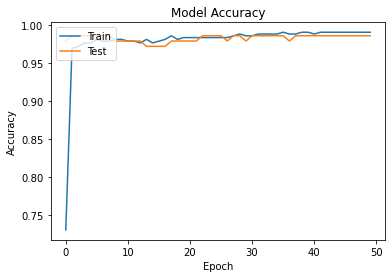

In [11]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_norm, y_test)

# Print the test accuracy and F1-score
print("Test accuracy:", test_accuracy)
print("Test F1-score:", f1_score(y_test, np.round(model.predict(X_test_norm))))

# Plot the accuracy per epoch for both train and test data
plt.plot(train_acc)
plt.plot(test_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


(e) Employ the logistic regression for the same classification problem. Carefully assess the
performance of logistic regression on this dataset.

In [12]:
X_train.iloc[0]

worst perimeter          87.40000
worst concave points      0.05366
mean concave points       0.01171
worst area              577.00000
worst radius             13.62000
worst texture            15.54000
mean texture             13.12000
area error               12.68000
worst concavity           0.11860
worst smoothness          0.09616
Name: 287, dtype: float64

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score


lr = LogisticRegression() # Instantiating logistic regression 
lr.fit(X_train_norm, y_train)  # Fitting the train data to lr

# Predict on the train and test set
y_train_pred = lr.predict(X_train_norm)
y_test_pred = lr.predict(X_test_norm)

# Calculate the accuracy and F1-score for the train and test set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)

# Print the train and test accuracy and F1-score
print("Train accuracy:", train_accuracy)
print("Train F1-score:", train_f1_score)
print("Test accuracy:", test_accuracy)
print("Test F1-score:", test_f1_score)


Train accuracy: 0.971830985915493
Train F1-score: 0.9777777777777777
Test accuracy: 0.9790209790209791
Test F1-score: 0.9832402234636872


(f) How many weights (i.e. parameters) does your fully-connected model in part (d) possess?
How many parameters does the logistic regression model in part (e) possess? Carefully
compare and contrast the two performances and determine which model should be employed as the more successful model for this classification task.


The number of weights fully connected neural network algorithm has are on all layers will be (64(10+1)) + (64*64 + 64) + (64+1) = 4929 . For the logistic regression there will be 11 weights (10 features and one bias term) associated with the model. 

From the output you provided, we can see that the fully-connected neural network achieved higher accuracy and F1-score on both the training and test sets compared to the logistic regression model. Specifically, the neural network achieved a test accuracy of 0.9860 and a test F1-score of 0.9888, while the logistic regression model achieved a test accuracy of 0.9790 and a test F1-score of 0.9832.

This indicates that the fully-connected neural network is the more successful model for this classification task, as it achieved higher accuracy and F1-score on the test set.

# question 02

2. Constructing a CNN Classifier: Define D to be a dataset consisting 5 − 10% of random
images of the MNIST. Redefine the target variable for D as follows:
• Positive Class: This class is formed by all images of D which are 2 or 7.
• Negative Class: This class is formed by all images of D which are different from 2 and
7 (i.e. images of 0, 1, 3, 4, 5, 6, 8, 9 digits)

(a) How many samples does D possess? What is the size of the positive class? What is the
size of the negative class? Determine the nature of this classification problem (balanced
vs. unbalanced)

In [78]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Redefine the target variable for D
y_train = np.where(np.logical_or(y_train==2, y_train==7), 1, 0)
y_test = np.where(np.logical_or(y_test==2, y_test==7), 1, 0)

# Keep only 5% of the data
percent_cap = 5
num_train = int(X_train.shape[0] * percent_cap / 100)
num_test = int(X_test.shape[0] * percent_cap / 100)
X_train = X_train[:num_train]
X_test = X_test[:num_test]
y_train = y_train[:num_train]
y_test = y_test[:num_test]

# Reshape the input data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Converting target to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

print('Shape of X_train=%s and shape of y_train=%s' % (X_train.shape, y_train.shape))
print('Shape of X_test=%s and shape of y_test=%s' % (X_test.shape, y_test.shape))


Shape of X_train=(3000, 28, 28, 1) and shape of y_train=(3000, 2)
Shape of X_test=(500, 28, 28, 1) and shape of y_test=(500, 2)


In [79]:
num_positive_train = np.sum(y_train[:, 1])
num_negative_train = np.sum(y_train[:, 0])

print(num_positive_train,num_negative_train)

628.0 2372.0


we have loaded 5 percet of data, so the total instances are 3000.The number of positive instances are 628 and number of negative instances are 2372.Hence it is clearly a unbalnced classification problem.

(b) Construct a convolutional neural network for this binary classification problem on D.
What metrics would you calculate through the training process?

In [80]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [81]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                    validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
94/94 [==============================] - 1s 10ms/step - loss: 1.6550 - accuracy: 0.9180 - val_loss: 0.0690 - val_accuracy: 0.9700
Epoch 2/50
94/94 [==============================] - 1s 9ms/step - loss: 0.0704 - accuracy: 0.9813 - val_loss: 0.0842 - val_accuracy: 0.9720
Epoch 3/50
94/94 [==============================] - 1s 8ms/step - loss: 0.0313 - accuracy: 0.9907 - val_loss: 0.0822 - val_accuracy: 0.9760
Epoch 4/50
94/94 [==============================] - 1s 8ms/step - loss: 0.0225 - accuracy: 0.9920 - val_loss: 0.0697 - val_accuracy: 0.9760
Epoch 5/50
94/94 [==============================] - 1s 8ms/step - loss: 0.0138 - accuracy: 0.9953 - val_loss: 0.0918 - val_accuracy: 0.9700
Epoch 6/50
94/94 [==============================] - 1s 8ms/step - loss: 0.0071 - accuracy: 0.9980 - val_loss: 0.0359 - val_accuracy: 0.9800
Epoch 7/50
94/94 [==============================] - 1s 8ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0201 - val_accuracy: 0.9900
Epoch 8/50
94/94 [=

2(b)answer : 
we calculate training loss which is calculated by binary cross-entropy as it is a binary classification problem, training accuracy, validation loss and validation accuracy metrics while training the model

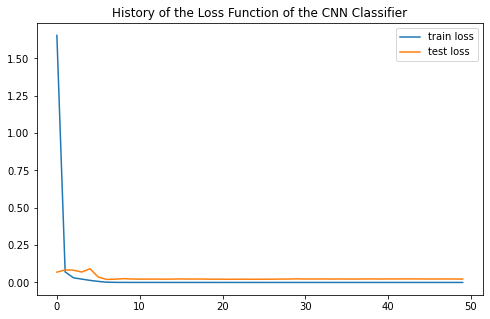

In [82]:
# Plotting the loss function from model's history
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'test loss') 
plt.title('History of the Loss Function of the CNN Classifier')
plt.legend(['train loss', 'test loss'])
plt.show()

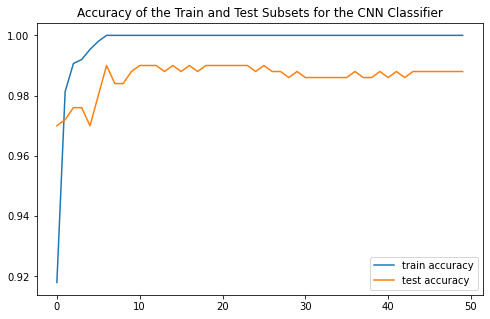

In [83]:
# Plotting accuracy score from model's history

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'test accuracy') 
plt.title('Accuracy of the Train and Test Subsets for the CNN Classifier')
plt.legend(['train accuracy', 'test accuracy'])
plt.show()

(c) What is the accuracy score of your CNN classifier? What is the accuracy score of a sharp classifier for this problem? Carefully assess the performance of the CNN classifier constructed in part (b).

The accuracy of the CNN classifier is The accuracy score of the CNN classifier on the validation set is 0.9900 (as reported in the validation accuracy during the last epoch of training).The sharp classifer accuracy differs for the positive and negative classes because of number of instances. If we assume all fell in positive class i.e (2 or 7) then accuracy is around 20.9 percent. If we assume all fell in negative class then accuracy will be 79.06 percentage.

By observing the graph the CNN model pretty well classifies the data as required. The elbow describes the trainng loss decreases rapidly while training and test loss decreases in the starting stage.Overall the model classifies well with no signs of overfitting.

4. Dimensionality Reduction and Clustering of Food Items: For this problem, use the
csv file food-nutrients.csv. This csv file which has been published by the U.S. Department
of Agriculture (USDA) consists of 8618 food items for which different food nutrients have
been measured. The goal in this exercise is twofold. Since the dataset includes too many
features, you will first use the principal component analysis to reduce the dimensionality of
the dataset. In the next step, you will apply clustering algorithms to partition the food items
into a number of clusters. In order to solve this exercise, proceed as follows:

(a) Read the csv file into a dataframe. How many columns does the dataset have? Three
columns of the dataset (CommonName, MfgName, and ScientificName) have a large number of missing values. Drop these 3 columns. The dataframe should now has 42 columns.

In [190]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('food-nutrients.csv')

# Drop the three columns with a large number of missing values
df.drop(['CommonName', 'MfgName', 'ScientificName'], axis=1, inplace=True)

# Check the number of columns in the resulting dataframe
print(f"The dataframe now has {len(df.columns)} columns.")


The dataframe now has 42 columns.


In [191]:
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",717.0,0.85,81.11,0.06,0.06,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",717.0,0.85,81.11,0.06,0.06,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",876.0,0.28,99.48,0.00,0.00,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",353.0,21.40,28.74,2.34,0.50,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",371.0,23.24,29.68,2.79,0.51,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


(b) The dataframe possesses 15 columns that include USRDA in their column titles. USRDA
stands for “U.S. Recommended Daily Allowance.” The USRDA measure was developed
by the Food and Drug Administration (FDA) since 1972, and this measure is specifically
developed for the use in nutritional labeling. In our analysis, we are not interested in
USRDA’s, and we solely focus on the nutrients of food items. Drop all 15 columns that
have USRDA in their title. Try to do this in an automatic manner (Search for the term
USRDA in the titles of columns, and if the term USRDA is found, drop the corresponding
column). After dropping USRDA columns, your dataframe should possess 27 columns
four of which are categorical (ID, FoodGroup, ShortDescrip, and Descrip). The remaining
23 columns are continuous features that record the food nutrients, and you will focus on
these columns for the rest of the exercise.

In [192]:
# Drop all columns that have "USRDA" in their title
df.drop(df.filter(regex='USRDA').columns, axis=1, inplace=True)

# Check the resulting dataframe
print(f"The dataframe now has {len(df.columns)} columns.")

The dataframe now has 27 columns.


In [193]:
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",717.0,0.85,81.11,0.06,0.06,0.0,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",717.0,0.85,81.11,0.06,0.06,0.0,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",876.0,0.28,99.48,0.00,0.00,0.0,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",353.0,21.40,28.74,2.34,0.50,0.0,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",371.0,23.24,29.68,2.79,0.51,0.0,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60


In [194]:
# Keep only the continuous feature columns
continuous_features = [col for col in df.columns if col not in ['ID', 'FoodGroup', 'ShortDescrip', 'Descrip']]
df_continuous = df[continuous_features]
df_cat=df[['ID', 'FoodGroup', 'ShortDescrip', 'Descrip']]

# Check the resulting dataframe
print(f"The dataframe now has {len(df_continuous.columns)} columns.")

The dataframe now has 23 columns.


In [195]:
df_continuous.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60


(c) Standardize the data. After standardization, all the 23 continuous features will be
dimensionless.

In [196]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
df_continuous_std = scaler.fit_transform(df_continuous)

# Convert the standardized data to a dataframe
df_continuous_std = pd.DataFrame(df_continuous_std, columns=df_continuous.columns)

# Check the resulting dataframe
df_continuous_std.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,2.896234,-1.011747,4.441289,-0.798867,-0.477914,-0.469058,0.757113,-0.546128,-0.244334,-0.137643,...,-0.451809,-0.395218,-0.245398,-0.311347,-0.467425,-0.548385,-0.079028,-0.649918,-0.410557,-0.559918
1,2.896234,-1.011747,4.441289,-0.798867,-0.477914,-0.469058,0.757113,-0.546128,-0.253595,-0.137643,...,-0.451809,-0.395218,-0.245398,-0.282415,-0.442978,-0.548385,-0.078401,-0.654842,-0.410557,-0.571830
2,3.834956,-1.065776,5.599153,-0.801069,-0.482325,-0.469058,0.957289,-0.550307,-0.281380,-0.137643,...,-0.516275,-0.402935,-0.344726,-0.309539,-0.470917,-0.584057,-0.079028,-0.753325,-0.445904,-0.583742
3,0.747208,0.936124,1.140402,-0.715158,-0.445564,-0.469058,0.133490,-0.205541,-0.001218,-0.137643,...,0.321775,-0.348916,2.257682,-0.239017,-0.416784,-0.173821,-0.077618,1.137542,0.066632,0.205414
4,0.853478,1.110532,1.199651,-0.698637,-0.444829,-0.469058,0.254109,-0.416579,0.008044,-0.137643,...,0.252864,-0.377855,2.982780,-0.267949,-0.395829,-0.155984,-0.077148,1.452687,0.066632,0.187546


(d) Apply principal component analysis (PCA) to the standardized data. Note that after
applying PCA, you will find 23 new continuous features which are linear combinations
of the old 23 features.


In [197]:
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA()
df_pca = pca.fit_transform(df_continuous_std)

# Convert the PCA results to a dataframe
df_pca = pd.DataFrame(df_pca, columns=[df_continuous.columns])

# Check the resulting dataframe
print(df_pca.head())

  Energy_kcal Protein_g     Fat_g    Carb_g   Sugar_g   Fiber_g  VitA_mcg  \
0   -1.121776 -1.182251 -3.661940  1.080920 -3.084161  0.838022  0.331073   
1   -1.114687 -1.184173 -3.662329  1.090738 -3.077430  0.837098  0.323428   
2   -0.994919 -1.573580 -4.697724  1.317311 -3.912684  0.940208  0.373919   
3    0.235910  0.566070 -1.905054 -0.834509  0.438104  0.051566  1.709057   
4    0.300785  0.537659 -2.307570 -0.903853  0.875466  0.014515  2.158001   

   VitB6_mg VitB12_mcg   VitC_mg  ... Riboflavin_mg Thiamin_mg Calcium_mg  \
0 -0.554879  -0.620704  1.426270  ...      0.755889   0.126454   0.328297   
1 -0.551897  -0.630773  1.432207  ...      0.744742   0.106275   0.329752   
2 -0.538498  -0.697954  1.763517  ...      0.920093   0.164202   0.429909   
3 -1.160471  -0.395269  0.275188  ...      0.465612   0.324195   0.193857   
4 -1.460309  -0.483304  0.282587  ...      0.429353   0.399280   0.265936   

  Copper_mcg   Iron_mg Magnesium_mg Manganese_mg Phosphorus_mg Selenium_mc

e) Plot the explained variance ratio by each PCA component. You can use a bar chart for
this purpose. Check that the sum of all 23 ratios is indeed 1.

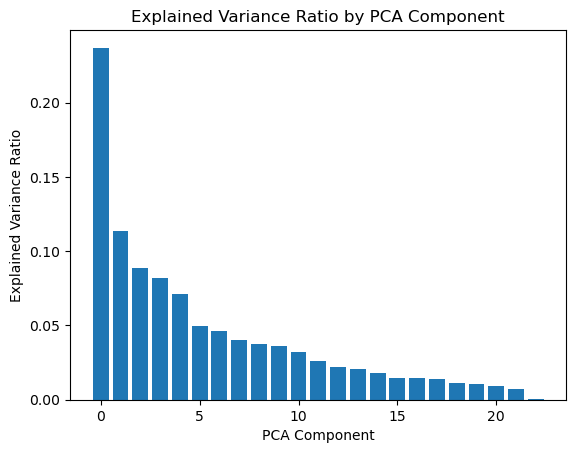

Sum of all ratios: 1.0000000000000002


In [118]:
import matplotlib.pyplot as plt
import numpy as np
# Get the explained variance ratio by each component
explained_variance_ratio = pca.explained_variance_ratio_

# Create a bar chart of the explained variance ratio
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio)
plt.xlabel('PCA Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by PCA Component')
plt.show()

# Check that the sum of all ratios is indeed 1
print(f"Sum of all ratios: {np.sum(explained_variance_ratio)}")

(f) Plot the cumulative explained variance ratio by PCA components.


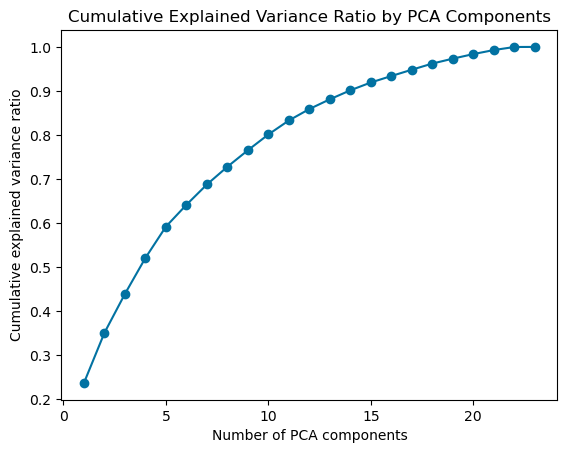

In [198]:
import matplotlib.pyplot as plt

# Get the explained variance ratio for each component
exp_var_ratio = pca.explained_variance_ratio_

# Get the cumulative sum of the explained variance ratio
cumulative_exp_var_ratio = np.cumsum(exp_var_ratio)

# Plot the cumulative explained variance ratio by component
plt.plot(range(1, len(cumulative_exp_var_ratio)+1), cumulative_exp_var_ratio, 'bo-')
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative explained variance ratio')
plt.title('Cumulative Explained Variance Ratio by PCA Components')
plt.show()


(g) How many PCA components should you choose in order to explain 80% of the whole
variance? Let us call this number dP CA. Commit to this many (i.e. dP CA) PCA
components for the rest of the exercise (This means that you have reduced the number
of dimensions from 23 to a smaller number which is nothing but the number of PCA
components (dP CA) needed to explain 80% of the whole variance for this dataset).

In [119]:
# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Find the number of components needed to explain 80% of the variance
dPCA = np.argmax(cumulative_variance_ratio >= 0.8) + 1

print(f"Number of PCA components to explain 80% of the variance: {dPCA}")


Number of PCA components to explain 80% of the variance: 10


10 PCA components are required to explain the 80% of the varience, so from now as required only 10 pca components are used for the rest of the exercise

(h) Take the first new continuous feature (i.e. the first PCA feature). Note that this feature
(and any other PCA feature) is a linear combination of the old 23 continuous features.
Find out the exact linear combination. What old features have the largest coefficients in
the linear combination? These features are the dominant old features for the first PCA
dimension.

In [120]:
# Get the loadings for the first PCA component
loadings = pca.components_[0]

# Create a dictionary of the form {feature_name: loading_value}
loadings_dict = dict(zip(df_continuous_std.columns, loadings))

# Sort the dictionary by absolute value of loading in descending order
sorted_loadings = sorted(loadings_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the top 5 features with the largest loadings
print("Top 5 dominant features for the first PCA dimension:")
for feature, loading in sorted_loadings[:5]:
    print(f"{feature}: {loading:.2f}")


Top 5 dominant features for the first PCA dimension:
Riboflavin_mg: 0.34
Niacin_mg: 0.34
VitB6_mg: 0.32
Iron_mg: 0.30
Folate_mcg: 0.28


In [121]:
df_pca.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,-1.121776,-1.182251,-3.661940,1.080920,-3.084161,0.838022,0.331073,-0.554879,-0.620704,1.426270,...,0.755889,0.126454,0.328297,-0.617969,-0.052841,0.242175,0.338832,0.208470,-0.039810,0.037014
1,-1.114687,-1.184173,-3.662329,1.090738,-3.077430,0.837098,0.323428,-0.551897,-0.630773,1.432207,...,0.744742,0.106275,0.329752,-0.614961,-0.052676,0.242515,0.317514,0.222450,-0.037616,0.036819
2,-0.994919,-1.573580,-4.697724,1.317311,-3.912684,0.940208,0.373919,-0.538498,-0.697954,1.763517,...,0.920093,0.164202,0.429909,-0.710286,-0.059469,0.312961,0.359950,0.238668,-0.072217,0.043196
3,0.235910,0.566070,-1.905054,-0.834509,0.438104,0.051566,1.709057,-1.160471,-0.395269,0.275188,...,0.465612,0.324195,0.193857,-0.330713,0.577464,-0.434290,-0.132495,-0.419169,0.380635,0.003282
4,0.300785,0.537659,-2.307570,-0.903853,0.875466,0.014515,2.158001,-1.460309,-0.483304,0.282587,...,0.429353,0.399280,0.265936,-0.272140,0.748962,-0.473246,-0.191197,-0.629038,0.363742,0.002252


The features Riboflavin_mg, Niacin_mg, vitB6_mg, Iron_mg, Folate_mcg are the dominant old features for the first PCA dimension, as they have the largest coefficients in the linear combination.

(i) Make a new dataframe, pca df, of the food items with dP CA continuous features.

In [152]:
pca_df = df_pca.iloc[:, :dPCA]


In [153]:
pca_df.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg
0,-1.121776,-1.182251,-3.661940,1.080920,-3.084161,0.838022,0.331073,-0.554879,-0.620704,1.426270
1,-1.114687,-1.184173,-3.662329,1.090738,-3.077430,0.837098,0.323428,-0.551897,-0.630773,1.432207
2,-0.994919,-1.573580,-4.697724,1.317311,-3.912684,0.940208,0.373919,-0.538498,-0.697954,1.763517
3,0.235910,0.566070,-1.905054,-0.834509,0.438104,0.051566,1.709057,-1.160471,-0.395269,0.275188
4,0.300785,0.537659,-2.307570,-0.903853,0.875466,0.014515,2.158001,-1.460309,-0.483304,0.282587


(j) In this part, you would like to apply K-means clustering algorithm to pca df. How many
clusters would you choose to start the algorithm with? Perform a thorough analysis to
find the optimal number of clusters.

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\KAKUT\Anaconda\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\KAKUT\\AppData\\Local\\Temp\\pip-install-z2kd025x\\kmeans_a5bd9b769e844ed0a00ec0867ae5d261\\setup.py'"'"'; __file__='"'"'C:\\Users\\KAKUT\\AppData\\Local\\Temp\\pip-install-z2kd025x\\kmeans_a5bd9b769e844ed0a00ec0867ae5d261\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\KAKUT\AppData\Local\Temp\pip-wheel-fxda2fvz'
       cwd: C:\Users\KAKUT\AppData\Local\Temp\pip-install-z2kd025x\kmeans_a5bd9b769e844ed0a00ec0867ae5d261\
  Complete output (19 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  creatin

  Using cached kmeans-1.0.2.tar.gz (5.9 kB)
  Running setup.py clean for KMeans
Failed to build KMeans
    Running setup.py install for KMeans: started
    Running setup.py install for KMeans: finished with status 'error'


C:\Users\KAKUT\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KAKUT\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KAKUT\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KAKUT\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KAKUT\Anaconda\lib\site-packages\sklearn\cluster\_k

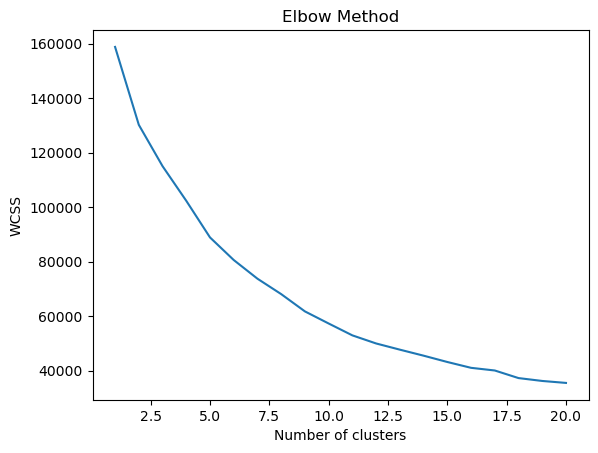

In [124]:
!pip install KMeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define a list of potential number of clusters to try
n_clusters = range(1, 21)

# Compute the within-cluster sum of squares (WCSS) for each number of clusters
wcss = []
for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

# Plot the WCSS as a function of the number of clusters
plt.plot(n_clusters, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()



In [28]:
# Importing 'KElbowVisualizer' from the 'cluster' module of yellowbrick
!pip install yellowbrick
!pip install KElbowVisualizer

ERROR: Could not find a version that satisfies the requirement KElbowVisualizer (from versions: none)
ERROR: No matching distribution found for KElbowVisualizer


C:\Users\KAKUT\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KAKUT\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KAKUT\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KAKUT\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KAKUT\Anaconda\lib\site-packages\sklearn\cluster\_k

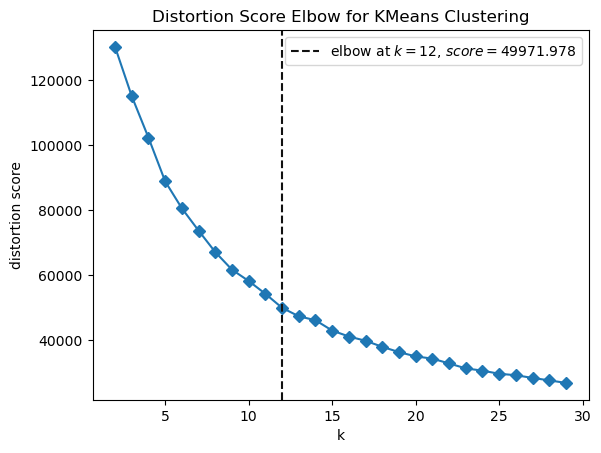

In [125]:
from yellowbrick.cluster import KElbowVisualizer  

model = KMeans()   # Elbow method applied with the usual Euclidean metric

# Choosing the range {2,3,...,30} for number of clusters

visualizer = KElbowVisualizer(model, k=(2,30), timings=False)  

visualizer.fit(pca_df)  # Fitting the data
visualizer.show()  # Display the results
plt.show()

C:\Users\KAKUT\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KAKUT\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KAKUT\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KAKUT\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KAKUT\Anaconda\lib\site-packages\sklearn\cluster\_k

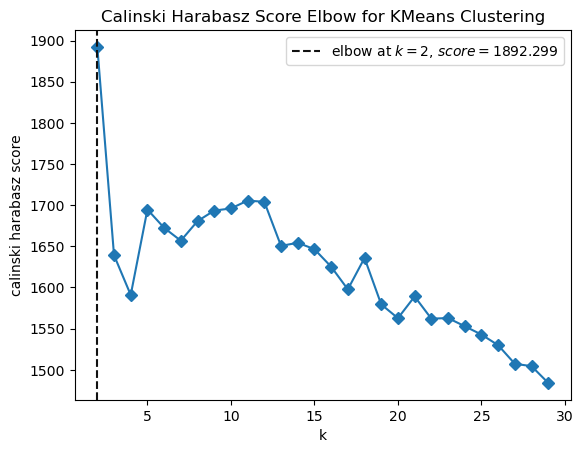

In [126]:
# Applying the Calinski-Harabasz score

visualizer = KElbowVisualizer(model, k=(2,30), metric = 'calinski_harabasz', timings=False)

visualizer.fit(pca_df)  # Fitting the data
visualizer.show()  # Display the results
plt.show()

C:\Users\KAKUT\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KAKUT\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KAKUT\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KAKUT\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KAKUT\Anaconda\lib\site-packages\sklearn\cluster\_k

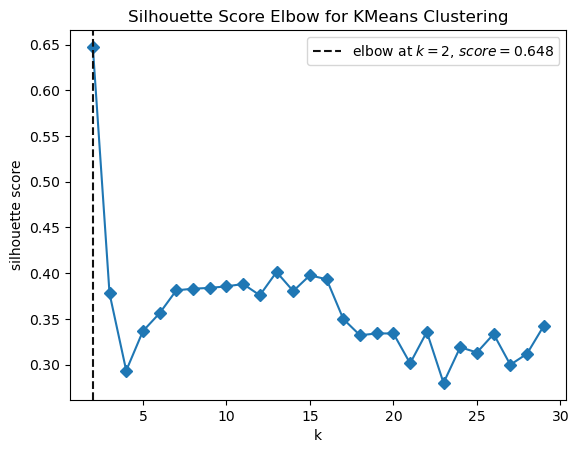

In [127]:
# Applying the Silhouette score

visualizer = KElbowVisualizer(model, k=(2,30), metric = 'silhouette' , timings=False) 

visualizer.fit(pca_df)  # Fitting the data
visualizer.show()  # Display the results
plt.show()

We can observe that different methods show differnt number of clusters like yellow brick shows 11, silhouette shows 2 and calinski harabasz shows 2 clusters. Hence Let us define a function to perform K-means clustering with different number of clusters and display the results geometrically.

In [39]:
!pip install --upgrade scikit-learn
!pip install --upgrade threadpoolctl


  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0


In [43]:
!pip uninstall numpy
!pip install numpy==1.21.4


^C


In [177]:
def kmeans_clusters(X, n_clust):
    k_means = KMeans(n_clusters=n_clust)
    k_means.fit(X)
    y_pred = k_means.predict(X)
    cl_centroids = k_means.cluster_centers_
    import matplotlib.style
    import matplotlib as mpl
    mpl.style.use('default')
    plt.figure(figsize=(6, 4))
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_pred, s=25)  
    plt.scatter(cl_centroids[:, 0], cl_centroids[:, 1], c='red', s=100) 
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.title('plot')
    plt.show()
    return cl_centroids

C:\Users\KAKUT\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


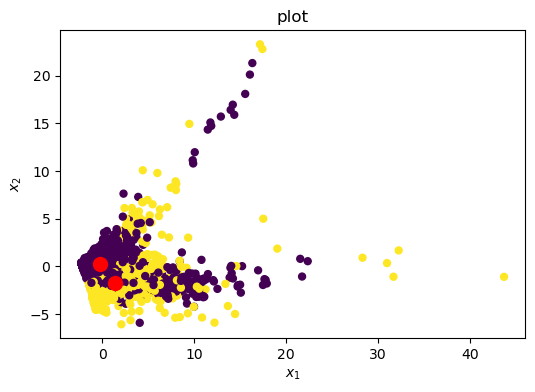

array([[-2.43111319e-01,  3.00447778e-01,  2.23396084e-01,
        -1.37639514e-01,  1.16369478e-02,  6.76490676e-02,
         1.01770247e-03, -5.74987838e-02, -2.13076864e-02,
         1.33788238e-02,  3.36656692e+00],
       [ 1.41181234e+00, -1.74478046e+00, -1.29732070e+00,
         7.99309403e-01, -6.75788626e-02, -3.92856197e-01,
        -5.91006995e-03,  3.33910789e-01,  1.23739424e-01,
        -7.76944015e-02,  1.49589258e+01]])

In [178]:
kmeans_clusters(pca_df, 2)  # Displaying kmeans results for K=2

C:\Users\KAKUT\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


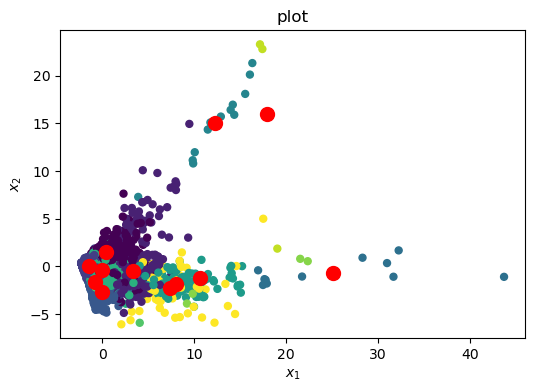

array([[ 3.76306808e-01,  1.54091212e+00, -3.46962153e-01,
        -1.01286779e+00, -1.76510595e-01, -1.74046789e-01,
         2.07057331e-01,  1.16678618e-01,  2.18742844e-01,
        -2.37658913e-01,  6.05541932e+00],
       [ 3.31372623e+00, -4.84067326e-01, -1.17911151e+00,
         1.58093065e-01,  1.33557342e+00, -2.89902972e-01,
        -1.11337619e+00,  7.82129992e-01, -5.86804053e-02,
         3.40201603e-01,  1.48816121e+01],
       [-1.48493143e+00,  5.41659926e-03,  8.48946868e-01,
         3.07553407e-01,  3.53595604e-01,  3.78676414e-01,
        -1.55324178e-01, -1.85651060e-01, -1.78224422e-01,
        -2.84178561e-02,  2.94074311e+00],
       [-6.19193253e-02, -2.67628065e+00, -2.94992838e-01,
         1.33469383e+00, -4.41860349e-01, -1.38869851e+00,
         9.11827233e-01,  5.62249215e-01,  4.91812607e-01,
        -7.46769835e-01,  1.70000000e+01],
       [ 2.51212667e+01, -6.48185332e-01,  8.31020432e+00,
        -4.04705168e+00, -7.58749658e+00,  3.42732622e+00,
  

In [179]:
kmeans_clusters(pca_df, 12)  # Displaying kmeans results for K=3

(j) answer : By oberving the clusters we can observe that, the number of optimal clusters will be 2.

(k) Perform K-means clustering with the number of clusters you determined in part (j)

In [180]:
def kmeans_clusters(X, n_clust):
    k_means = KMeans(n_clusters=n_clust)
    k_means.fit(X)
    y_pred = k_means.predict(X)
    cl_centroids = k_means.cluster_centers_
    import matplotlib.style
    import matplotlib as mpl
    mpl.style.use('default')
    plt.figure(figsize=(6, 4))
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_pred, s=25)  
    plt.scatter(cl_centroids[:, 0], cl_centroids[:, 1], c='red', s=100) 
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.title('A Toy Dataset with 2 Features')
    plt.show()
    return cl_centroids


C:\Users\KAKUT\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


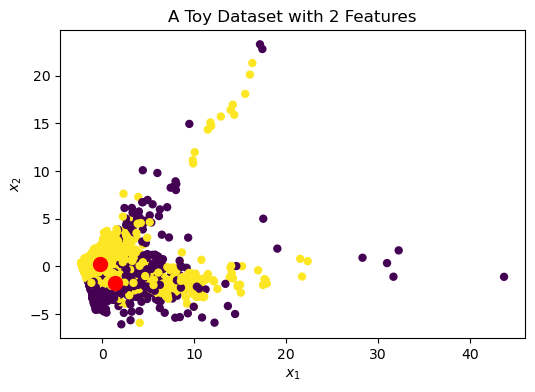

array([[ 1.41181234e+00, -1.74478046e+00, -1.29732070e+00,
         7.99309403e-01, -6.75788626e-02, -3.92856197e-01,
        -5.91006995e-03,  3.33910789e-01,  1.23739424e-01,
        -7.76944015e-02,  1.49589258e+01],
       [-2.43111319e-01,  3.00447778e-01,  2.23396084e-01,
        -1.37639514e-01,  1.16369478e-02,  6.76490676e-02,
         1.01770247e-03, -5.74987838e-02, -2.13076864e-02,
         1.33788238e-02,  3.36656692e+00]])

In [181]:
kmeans_clusters(pca_df, 2)  # Displaying kmeans results for K=2

(l) Add a new column to pca df which indicates the cluster label. Find the size of each
cluster you constructed in part (k).

In [183]:
KMeans=KMeans(n_clusters=2,random_state=42)
pca_df['cluster_label'] = KMeans.fit_predict(pca_df)


C:\Users\KAKUT\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\KAKUT\AppData\Local\Temp\ipykernel_27780\748627628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_df['cluster_label'] = KMeans.fit_predict(pca_df)


In [184]:
pca_df.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,cluster_label
0,-1.121776,-1.182251,-3.661940,1.080920,-3.084161,0.838022,0.331073,-0.554879,-0.620704,1.426270,1
1,-1.114687,-1.184173,-3.662329,1.090738,-3.077430,0.837098,0.323428,-0.551897,-0.630773,1.432207,1
2,-0.994919,-1.573580,-4.697724,1.317311,-3.912684,0.940208,0.373919,-0.538498,-0.697954,1.763517,1
3,0.235910,0.566070,-1.905054,-0.834509,0.438104,0.051566,1.709057,-1.160471,-0.395269,0.275188,0
4,0.300785,0.537659,-2.307570,-0.903853,0.875466,0.014515,2.158001,-1.460309,-0.483304,0.282587,0


In [185]:
cluster_sizes = pca_df['cluster_label'].value_counts()
print(cluster_sizes)
print(pca_df.columns)


(cluster_label,)
0                   7352
1                   1266
dtype: int64
MultiIndex([(  'Energy_kcal',),
            (    'Protein_g',),
            (        'Fat_g',),
            (       'Carb_g',),
            (      'Sugar_g',),
            (      'Fiber_g',),
            (     'VitA_mcg',),
            (     'VitB6_mg',),
            (   'VitB12_mcg',),
            (      'VitC_mg',),
            ('cluster_label',)],
           )


The two clusters are with labels 3 and 6.

(m) Take two of the largest clusters and find the number of food items in each food category.


In [186]:


# Merge the PCA columns into the main data frame with categorical features
df_merged = pd.concat([pca_df, df[['ID', 'FoodGroup', 'ShortDescrip', 'Descrip']]], axis=1)

# Rename the columns to remove the parentheses and comma
df_merged.columns = list(pca_df.columns) + ['ID', 'FoodGroup', 'ShortDescrip', 'Descrip']

df_merged.columns


Index([  ('Energy_kcal',),     ('Protein_g',),         ('Fat_g',),
              ('Carb_g',),       ('Sugar_g',),       ('Fiber_g',),
            ('VitA_mcg',),      ('VitB6_mg',),    ('VitB12_mcg',),
             ('VitC_mg',), ('cluster_label',),               'ID',
              'FoodGroup',     'ShortDescrip',          'Descrip'],
      dtype='object')

In [187]:
df_merged[('cluster_label',)]

0       1
1       1
2       1
3       0
4       0
       ..
8613    0
8614    0
8615    1
8616    0
8617    0
Name: (cluster_label,), Length: 8618, dtype: int32

In [188]:
# Take two of the largest clusters
largest_clusters = pca_df[('cluster_label',)].value_counts().nlargest(2).index

# Print the number of food items in each food category for the two largest clusters
for cluster_label in largest_clusters:
    cluster_size = len(df_merged[df_merged[('cluster_label',)] == cluster_label])
    food_group_sizes = df_merged[df_merged[('cluster_label',)] == cluster_label]['FoodGroup'].value_counts()
    print(f"Cluster {cluster_label}: {cluster_size} food items")
    print(f"Food group sizes in cluster {cluster_label}:")
    print(food_group_sizes)
    print()

Cluster 0: 7352 food items
Food group sizes in cluster 0:
Beef Products                          928
Vegetables and Vegetable Products      807
Baked Products                         500
Soups, Sauces, and Gravies             448
Lamb, Veal, and Game Products          421
Poultry Products                       375
Fast Foods                             367
Baby Foods                             332
Pork Products                          330
Fruits and Fruit Juices                320
Legumes and Legume Products            309
Beverages                              277
Finfish and Shellfish Products         254
Dairy and Egg Products                 251
Breakfast Cereals                      251
Sausages and Luncheon Meats            239
Sweets                                 150
Cereal Grains and Pasta                144
American Indian/Alaska Native Foods    142
Snacks                                 132
Meals, Entrees, and Side Dishes        113
Restaurant Foods                       

(n) What are the dominant food groups in the two clusters in part (m)? Based on this
result, what names would you give to these two clusters?


Based on the food group sizes in the two clusters, we can see that Cluster 0 contains a larger number of food items and is dominated by food groups such as Beef Products, Vegetables and Vegetable Products, Baked Products, Soups, Sauces, and Gravies, Lamb, Veal, and Game Products, Poultry Products, etc. Cluster 1 contains a smaller number of food items and is dominated by food groups such as Baked Products, Sweets, Fats and Oils, Breakfast Cereals, Legumes and Legume Products, Nut and Seed Products, etc.

Given these dominant food groups, we could name Cluster 0 as "Mainstream Foods" and Cluster 1 as "Snacks and Sweets"

# Course Evaluation 

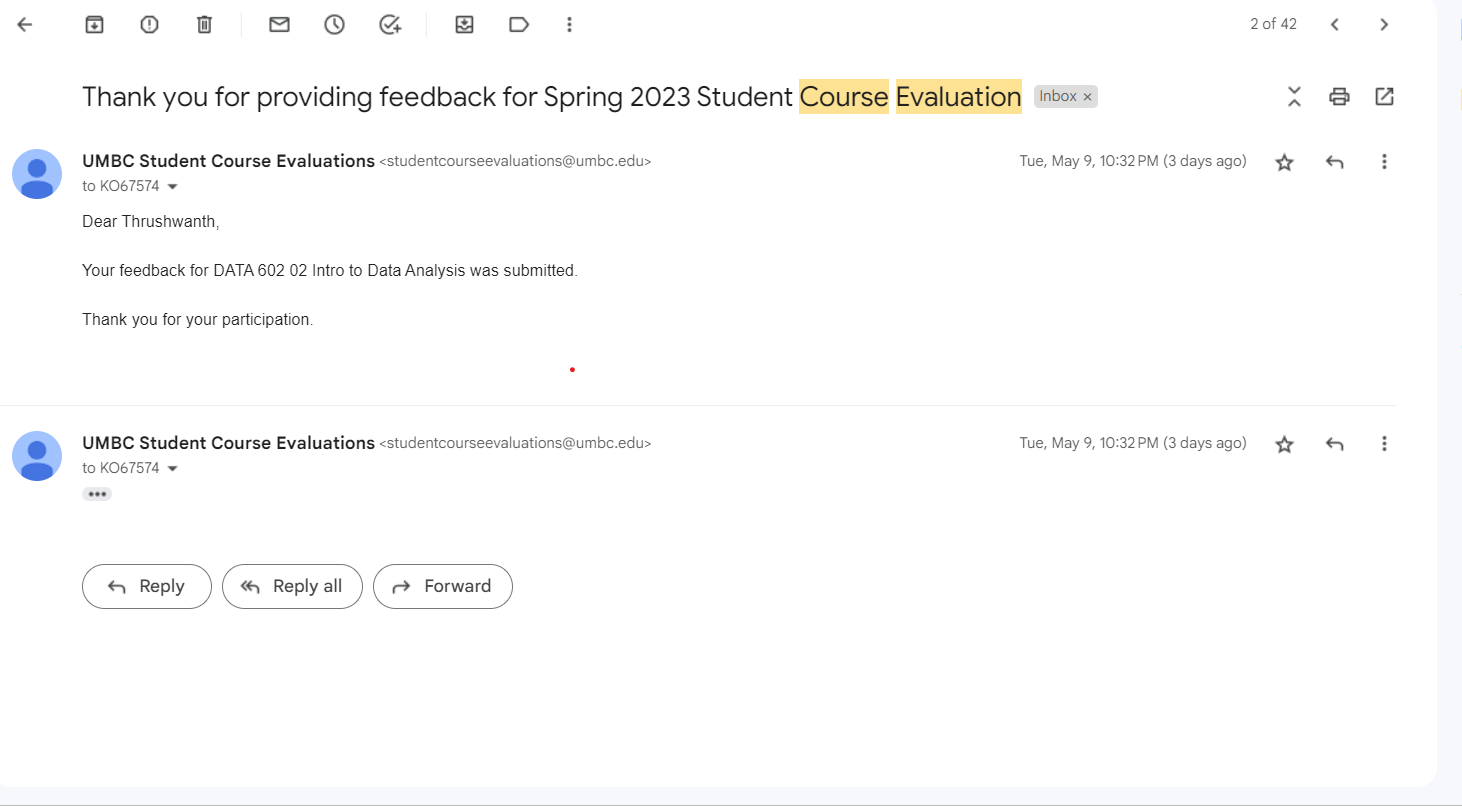

# Question 03


3. Length of Time Sequence in RNN Models: Consider the example of Tesla’s stock value
we studied in lecture 11. For this example, we structured the input of the model in the form
of a tensor of shape (B, T = 50, d = 4). In this problem, we would like to study the effect of
the length of the input sequence on the accuracy of the model.

(a) Take the same simple RNN model we constructed in class and run this model for T =
{5, 10, 20, 30, 40, 50, 60}. Collect the R2
-scores for the train and test data for different
values of T in a dataframe. Plot the R2
-score for the train and test data as a function
of T.
Note: Try to automate this problem as much as you can. Do not execute the model 7
times by hand! Take the advantage of appropriate loops and/or functions

In [202]:
# Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

In [235]:
!pip install numpy==1.23

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.0 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.0 which is incompatible.



  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.0
    Uninstalling numpy-1.24.0:
      Successfully uninstalled numpy-1.24.0


In [229]:
# Importing basic tensorflow modules
# Importing basic tensorflow modules 

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, SimpleRNN, LSTM
from tensorflow.keras.models import Model, Sequential 
from tensorflow.keras.optimizers import Adam
import tensorflow_addons as tfa
from tensorflow.keras.utils import plot_model 

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [212]:
df = pd.read_csv('Tesla-Stocks.csv')     # Reading the csv source file as a dataframe
df.shape

(2416, 7)

In [213]:
# Defining a function that arranges the dataset in the form of (B,T,d) numpy array (T=n_day)

def time_sequence(df, n_day):
    X = []
    y = []
    for i in range(len(df)-n_day):
        a = []
        b = 0
        for j in range(n_day):
            a.append([df.iloc[i+j]['Open'], df.iloc[i+j]['High'], df.iloc[i+j]['Low'], df.iloc[i+j]['Close']])
            b = df.iloc[i+j+1]['Open']
        X.append(a)
        y.append(b)
    X = np.array(X)
    y = np.array(y)
    return X, y

In [214]:
# Forming the sequence input data for the interval of 50 days

n_days = 50

start_time = time.time()
X, y = time_sequence(df, n_days)
print("Computing time: %s seconds" % (round(time.time() - start_time, 3)))

Computing time: 33.869 seconds


In [215]:
# Displaying the shape of the features and the target

print('X shape :', X.shape)
print('y shape :', y.shape)

X shape : (2366, 50, 4)
y shape : (2366,)


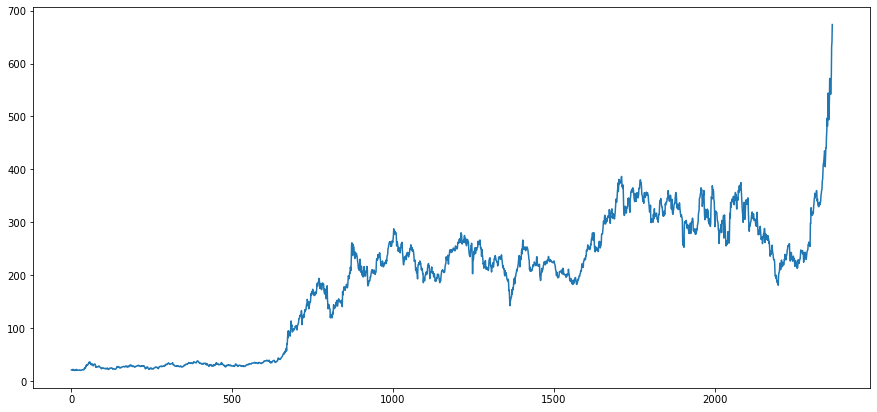

In [216]:
# Plotting the target variable (the value of stock when market opens) per day

plt.subplots(figsize = (15,7))
plt.plot(y)
plt.show()

In [217]:

# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)


In [218]:
# Displaying the shape of the train and test datasets

print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)
print('X_test shape :', X_test.shape)
print('y_test shape :', y_test.shape)

X_train shape : (1774, 50, 4)
y_train shape : (1774,)
X_test shape : (592, 50, 4)
y_test shape : (592,)


In [219]:
# Converting data into tensorflow tensor objects and presenting the shape of tensors

X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

print('X_train shape : ', X_train.shape)
print('y_train shape : ', y_train.shape)
print('X_test shape : ', X_test.shape)
print('y_test shape : ', y_test.shape)

NameError: name 'tf' is not defined

In [207]:
# Define a function to run the RNN model for a given sequence length and return the R2-scores
def run_rnn_model(T):
    # Form the sequence input data for the given length of sequence
    X, y = time_sequence(df, T)
    
    # Split the data into train and test subsets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)
    
    # Convert data into tensorflow tensor objects
    X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
    X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
    y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
    y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)
    
    # Create an RNN model with 128 neurons and learning rate 0.001
    rnn_model = create_rnn_model(n_neurons=128, shape=(X_train.shape[1], X_train.shape[2]), learning_rate=0.001)
    
    # Train the model for 150 epochs
    epochs = 150
    rnn_model_history = rnn_model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=0)
    
    # Calculate R2-scores for train and test data
    y_train_pred = rnn_model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    y_test_pred = rnn_model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    
    return train_r2, test_r2

# Create a list of sequence lengths to test
T_list = [5, 10, 20, 30, 40, 50, 60]

# Create an empty dataframe to collect the R2-scores
r2_scores_df = pd.DataFrame(columns=['T', 'train_r2', 'test_r2'])

# Loop over the sequence lengths and collect the R2-scores in the dataframe
for T in T_list:
    train_r2, test_r2 = run_rnn_model(T)
    r2_scores_df = r2_scores_df.append({'T': T, 'train_r2': train_r2, 'test_r2': test_r2}, ignore_index=True)

# Plot the R2-scores for train and test data as a function of T
plt.plot(r2_scores_df['T'], r2_scores_df['train_r2'], label='Train')
plt.plot(r2_scores_df['T'], r2_scores_df['test_r2'], label='Test')
plt.xlabel('Sequence Length (T)')
plt.ylabel('R2-score')
plt.legend()
plt.show()


NameError: name 'time_sequence' is not defined